In [1]:
print("Hello")

Hello


In [2]:
import cv2


cap = cv2.VideoCapture("G:/Python Project/gullyBadminton.mp4")

ret,frame1 = cap.read()
ret,frame2 = cap.read()

while cap.isOpened():
    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5), 0)
    _, thres = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    
    dilated = cv2.dilate(thres, None, iterations = 80)
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        
        if (cv2.contourArea(contour) < 60) or (cv2.contourArea(contour) > 20)  :
            continue
            
#         cv2.drawContours(frame1, contours, -1, (0,255,0), 2)
        cv2.rectangle(frame1, (x,y), (x+w, y+h), (0,255,0),2)
        
    
#     cv2.drawContours(frame1, contours, -1, (0,255,0), 2)
    
    cv2.imshow("Frame", frame1)
    frame1 = frame2
    ret, frame2 = cap.read()
    ret, frame2 = cap.read()
    ret, frame2 = cap.read()
    key = cv2.waitKey(30)
    
    if key == 27:
        break
        

cv2.destroyAllWindows()
cap.release()



KeyboardInterrupt: 

In [ ]:
print("hey")

In [131]:
import cv2
import numpy as np

rect = (0,0,0,0)
start=False
end = False
count = 0


def displayLine(image,lines):
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(image, (x1,y1), (x2,y2), (0,255,0),2)
    return image


def getLines(image):
    mask = cv2.GaussianBlur(image,(5,5), 0)
    canny = cv2.Canny(mask,80,100)
    lines = cv2.HoughLinesP(canny,1,np.pi/180,100, np.array([]), minLineLength=120, maxLineGap =13)

def on_mouse(event, x, y, flags, params):
    
    global rect,start,end,count
    count +=1
    
    if event == cv2.EVENT_LBUTTONDOWN and  start == False:
        print("click")
        start = True
        rect = (x,y,0,0)


    elif event == cv2.EVENT_LBUTTONUP and end == False:
        print("lift")
        end = True
        rect = (rect[0],rect[1],x,y)
        
    cv2.line(img=frame, pt1=(rect[0], rect[1]), pt2=(rect[0], rect[1]), color=(255, 255, 255), thickness=2, lineType=8, shift=0)

cap = cv2.VideoCapture("G:/Python Project/GB3.mp4")



object_detector = cv2.createBackgroundSubtractorMOG2(history = 60, varThreshold = 55, detectShadows = False)

ret, frame = cap.read()
# cv2.imshow("frame", frame)
# cv2.setMouseCallback('frame', on_mouse, 0)

cv2.imshow("frame", frame)
# cv2.namedWindow("frame")
if count <2 :
    cv2.setMouseCallback("frame",on_mouse)
# cv2.waitKey(-1)
print(" inside wait ")
key = cv2.waitKey(0)


    
# frameCounter = 1
#     if frameCounter == 1:
        
print(rect)

while True:
    ret, frame = cap.read()
    
    width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    height,width,_ = frame.shape
#     roi = frame[200: 600, 100:900]
    
    mask = object_detector.apply(frame)
    mask = cv2.GaussianBlur(mask,(7,7), 0)#blur
    canny = cv2.Canny(mask,100,250)
    _, mask = cv2.threshold(mask,254,255, cv2.THRESH_BINARY)
    contours,_ = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < 10 and area >5:
#             cv2.drawContours(roi, [cnt], -1, (0,255,0), 2)
            (x,y,w,h) = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),2)
            peri = cv2.arcLength(cnt,True)
            approx = cv2.approxPolyDP(cnt,0.02*peri, True)
            cv2.putText(frame, str(len(approx)), (x+w+10,y+h+10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (130,255,255),2)
        
#     cv2.imshow("roi", roi)
    
    cv2.line(img=mask, pt1=(int(rect[0]), int(rect[1])), pt2=(int(rect[2]), int(rect[3])), color=(255, 255, 255), thickness=2, lineType=8, shift=0)
#     cv2.line(img=frame, pt1=(10, 100), pt2=(1000, 200), color=(255, 255, 255), thickness=2, lineType=8, shift=0)
    cv2.imshow("mask", mask)
    cv2.imshow("frame", frame)
    cv2.imshow("canny", canny)
#     cv2.imshow("actual", actual)
    
    key = cv2.waitKey(30)
    
    if key == 27:
        break
        

cv2.destroyAllWindows()
cap.release()

 inside wait 
click
lift
(315, 468, 1150, 548)


KeyboardInterrupt: 

In [2]:
import cv2
TrackerDict = {'csrt': cv2.TrackerCSRT_create,
               'kcf': cv2.TrackerKCF_create,
               'mil': cv2.TrackerMIL_create}

tracker = TrackerDict['kcf']()

cap = cv2.VideoCapture("G:/Python Project/gullyBadminton.mp4")
# print("import")
# i=1
# while i <20 :
#     i = i+1
ret, frame = cap.read()
# roi = frame[200: 600, 100:900]

cv2.imshow('TFrame', frame)
bb = cv2.selectROI('TFrame',frame)

tracker.init(frame,bb) 
while True:
    ret, frame = cap.read()
#     roi = frame[200: 600, 100:900]
    if not ret:
        break
    (success, box) = tracker.update(frame)
 
    if success:
        (x,y,w,h) = [int(a) for a in box]
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,255,0), 2)
        
    cv2.imshow('TFrame', frame)
    key = cv2.waitKey(1)
    
    if key == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

KeyboardInterrupt: 

In [21]:
 
    peri = cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,0.02*peri, True)


In [ ]:

    lower = np.array([250,250,250])
upper = np.array([255,255,255])
    frameMask = cv2.inRange(frame, lower, upper)
    actual = cv2.bitwise_and(frame, frame, mask = frameMask)


<ipython-input-19-3ec1188d2db3>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  data = plt.ginput(4)


KeyboardInterrupt: 

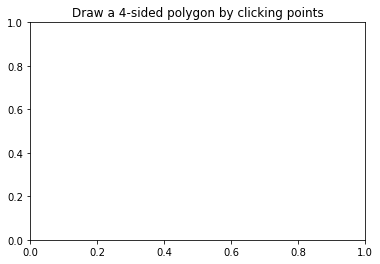

Enter no of lines: 7
click
lift
(256, 388, 1018, 401)
click
lift
(253, 218, 260, 381)
click
lift
(1041, 238, 1028, 392)
click
lift
(256, 228, 1033, 246)
click
lift
(1021, 407, 1280, 612)
click
lift
(251, 394, 26, 703)
click
lift
(665, 476, 757, 712)
click
lift
[(256, 388, 1018, 401), (253, 218, 260, 381), (1041, 238, 1028, 392), (256, 228, 1033, 246), (1021, 407, 1280, 612), (251, 394, 26, 703), (665, 476, 757, 712)]
388
218
238
228
407
394
476


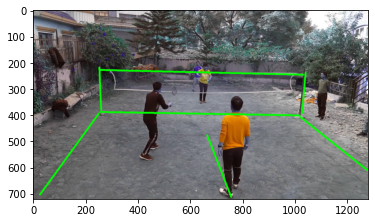

here


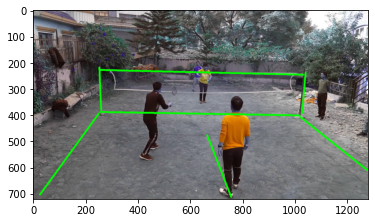

In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

rect = (0,0,0,0)
start=False
end = False
count = 0

val = int(input("Enter no of lines: "))
poly = []

def on_mouse(event, x, y, flags, params):
    global rect,start,end,count
    count+=1
    if event == cv2.EVENT_LBUTTONDOWN:
        print("click")
        start = True
        rect = (x,y,0,0)


    elif event == cv2.EVENT_LBUTTONUP:
        print("lift")
        end = True
        rect = (rect[0],rect[1],x,y)
        
#     print(rect)

def displayLine(image,lines):
    lineImage = np.zeros_like(image)
    if lines is not None:
        for line in lines:
#             print(line)
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(lineImage, (x1,y1), (x2,y2), (0,255,0),2)
    return lineImage        

def roi(image):
    width  = image.shape[1]
    height = image.shape[0]
    polygons = np.array([
        [(0,450),(0,height),(width,height),(width,450)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    masked_image = cv2.bitwise_and(canny,mask)
    return masked_image


cap = cv2.VideoCapture("G:/Python Project/GB4.mp4")
ret, frame = cap.read()
copy = np.copy(frame)
mask = cv2.GaussianBlur(frame,(5,5), 0)#blur
canny = cv2.Canny(mask,20,90)
roiimage = roi(canny)
lines = cv2.HoughLinesP(roiimage,1,np.pi/180,50, np.array([]), minLineLength=90, maxLineGap =12)
line_image = displayLine(frame,lines)

combo = cv2.addWeighted(copy,0.8, line_image,1, 1)

cv2.imshow("in",canny)
for i in range(val):
    count =0
    start = False
    end = False
    if count <2 :
        cv2.setMouseCallback("in",on_mouse)
        key = cv2.waitKey(0)
        cv2.line(canny, (int(rect[0]),int(rect[1])), (int(rect[2]),int(rect[3])), (255,255,255),5)
        cv2.imshow("in",canny)
        poly.append(rect)
        print(rect)

key = cv2.waitKey(0)
print(poly)
for i in range(val):
    print(poly[i][1])
    cv2.line(frame, (int(poly[i][0]),int(poly[i][1])), (int(poly[i][2]),int(poly[i][3])), (0,255,0),5)
# print(rect2)
# print(rect3)
plt.imshow(canny)
plt.imshow(frame)
plt.show(0)
print("here")

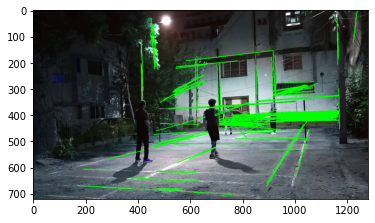

here


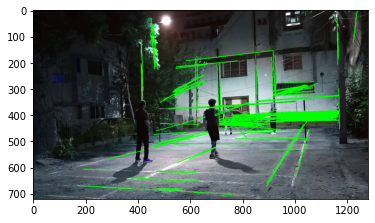

In [21]:
import matplotlib.pyplot as plt
import cv2

def displayLine(image,lines):
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(image, (x1,y1), (x2,y2), (0,255,0),2)
    return image        
        


cap = cv2.VideoCapture("G:/Python Project/GB1.mp4")
ret, frame = cap.read()
copy = np.copy(frame)
mask = cv2.GaussianBlur(frame,(5,5), 0)#blur
canny = cv2.Canny(mask,80,92)
lines = cv2.HoughLinesP(canny,1,np.pi/180,100, np.array([]), minLineLength=100, maxLineGap =15)
line_image = displayLine(frame,lines)
plt.imshow(frame)
# plt.imshow(canny)
plt.show(0)
print("here")